In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv("dataframes/freq_raw.csv")
df.head()

,file,animal,freq0,freq1,freq2,freq3,freq4,freq5,freq6,freq7,...,freq241,freq242,freq243,freq244,freq245,freq246,freq247,freq248,freq249,freq250
0,audio-dataset/cats_dogs/cat_74.wav,1,8.086168,6.813196,0.651597,-6.359843,-10.394340,-11.307176,-14.386157,-16.761415,...,-50.192669,-50.192669,-50.192669,-50.192669,-50.192669,-50.192669,-50.192669,-50.192669,-50.192669,-50.192669
1,audio-dataset/cats_dogs/dog_barking_63.wav,0,-14.020511,-17.609503,-29.791566,-31.501912,-32.045335,-29.771676,-20.327771,-11.130250,...,-42.455536,-42.455536,-42.455536,-42.455536,-42.455536,-42.455536,-42.455536,-42.455536,-42.455536,-42.455536
2,audio-dataset/cats_dogs/cat_60.wav,1,9.887736,20.227963,18.509231,1.091707,2.596950,-2.524327,6.518483,11.146668,...,-38.824154,-38.824154,-38.824154,-38.824154,-38.824154,-38.824154,-38.824154,-38.824154,-38.824154,-38.824154
3,audio-dataset/cats_dogs/dog_barking_77.wav,0,-12.092080,-15.625075,-23.819625,-10.038227,-2.145106,-0.567936,-9.483675,-4.013952,...,-41.520092,-41.520092,-41.520092,-41.520092,-41.520092,-41.520092,-41.520092,-41.520092,-41.520092,-41.520092
4,audio-dataset/cats_dogs/cat_48.wav,1,-30.140636,-24.407700,-20.097540,-20.254327,-23.591153,-24.497132,-23.473559,-23.738149,...,-40.019665,-40.019665,-40.019665,-40.019665,-40.019665,-40.019665,-40.019665,-40.019665,-40.019665,-40.019665


In [24]:
y = df["animal"]
X = df.drop(["file","animal"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [32]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.6195652173913043

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.5292095  0.14777726 0.11547598]


In [34]:
np.where(y_train == 1)

(array([  0,   2,   4,   6,   7,   8,   9,  13,  17,  18,  19,  22,  23,
         24,  27,  28,  31,  32,  35,  40,  42,  43,  44,  46,  47,  48,
         49,  50,  51,  52,  53,  55,  56,  58,  59,  60,  63,  65,  66,
         68,  71,  72,  73,  77,  78,  81,  83,  85,  86,  87,  88,  89,
         92,  98,  99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110,
        112, 113, 114, 115, 116, 120, 121, 126, 128, 129, 130, 131, 132,
        133, 139, 141, 142, 143, 144, 148, 149, 151, 153, 154, 156, 158,
        159, 160, 162, 163, 166, 168, 170, 171, 172, 174, 176, 177, 178,
        180, 182, 184]),)

In [46]:
.shape

(107,)

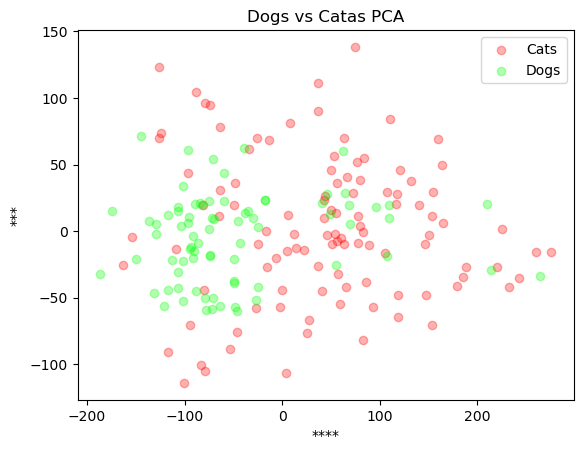

In [50]:
import matplotlib.pyplot as plt

idx_cat = np.where(y_train == 1)
idx_dog = np.where(y_train == 0)
plt.title("Dogs vs Catas PCA")
plt.xlabel("****")
plt.ylabel("***")
plt.scatter(X_train[idx_cat][:,0],X_train[idx_cat][:,2], color = "red", label = "Cats",alpha = 0.3)
plt.scatter(X_train[idx_dog][:,0],X_train[idx_dog][:,2], color = "lime", label = "Dogs",alpha = 0.3)
plt.legend()
plt.show()

In [29]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [30]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.6195652173913043